# Student Feedback Analysis
### By: Khushi Ghadigaonkar

---

## 1. Load & Explore Dataset
## 2. Clean & Prepare Data
## 3. Calculate Averages
## 4. Visualizations
  - Distribution of Average Scores
  - Box Plot of Feedback Scores
  - Feedback Question-wise Scores
  - Department-wise Satisfaction

## 5. Final Summary & Suggestions


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Student_Satisfaction_Survey.csv to Student_Satisfaction_Survey.csv


In [5]:
import pandas as pd


In [7]:
df = pd.read_csv("Student_Satisfaction_Survey.csv", encoding='latin1')
df.head()

,SN,Total Feedback Given,Total Configured,Questions,Weightage 1,Weightage 2,Weightage 3,Weightage 4,Weightage 5,Average/ Percentage,Course Name,Basic Course
0,1,1,12,How much of the syllabus was covered in the cl...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
1,2,1,12,How well did the teachers prepare for the clas...,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
2,3,1,12,How well were the teachers able to communicate?,0,0,0,0,1,5.00 / 100.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
3,4,1,12,The teachers approach to teaching can best be...,0,0,1,0,0,3.00 / 60.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY
4,5,1,12,Fairness of the internal evaluation process by...,0,0,0,1,0,4.00 / 80.00,FY B.VOC FOOD TECHNOLOGY,B.VOC FOOD TECHNOLOGY


In [8]:
!pip install textblob wordcloud

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

%matplotlib inline

In [11]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sn                    580 non-null    int64 
 1   total_feedback_given  580 non-null    int64 
 2   total_configured      580 non-null    int64 
 3   questions             580 non-null    object
 4   weightage_1           580 non-null    int64 
 5   weightage_2           580 non-null    int64 
 6   weightage_3           580 non-null    int64 
 7   weightage_4           580 non-null    int64 
 8   weightage_5           580 non-null    int64 
 9   average/_percentage   580 non-null    object
 10  course_name_          580 non-null    object
 11  basic_course          580 non-null    object
dtypes: int64(8), object(4)
memory usage: 54.5+ KB


In [14]:
# Split column into two separate values
df[['average_score', 'percentage']] = df['average/_percentage'].str.split("/", expand=True)
df['average_score'] = df['average_score'].astype(float)
df['percentage'] = df['percentage'].str.replace('%', '').astype(float)

/tmp/ipython-input-15-3610695662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="questions", x="average_score", data=df, palette="viridis")
/tmp/ipython-input-15-3610695662.py:9: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-15-3610695662.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


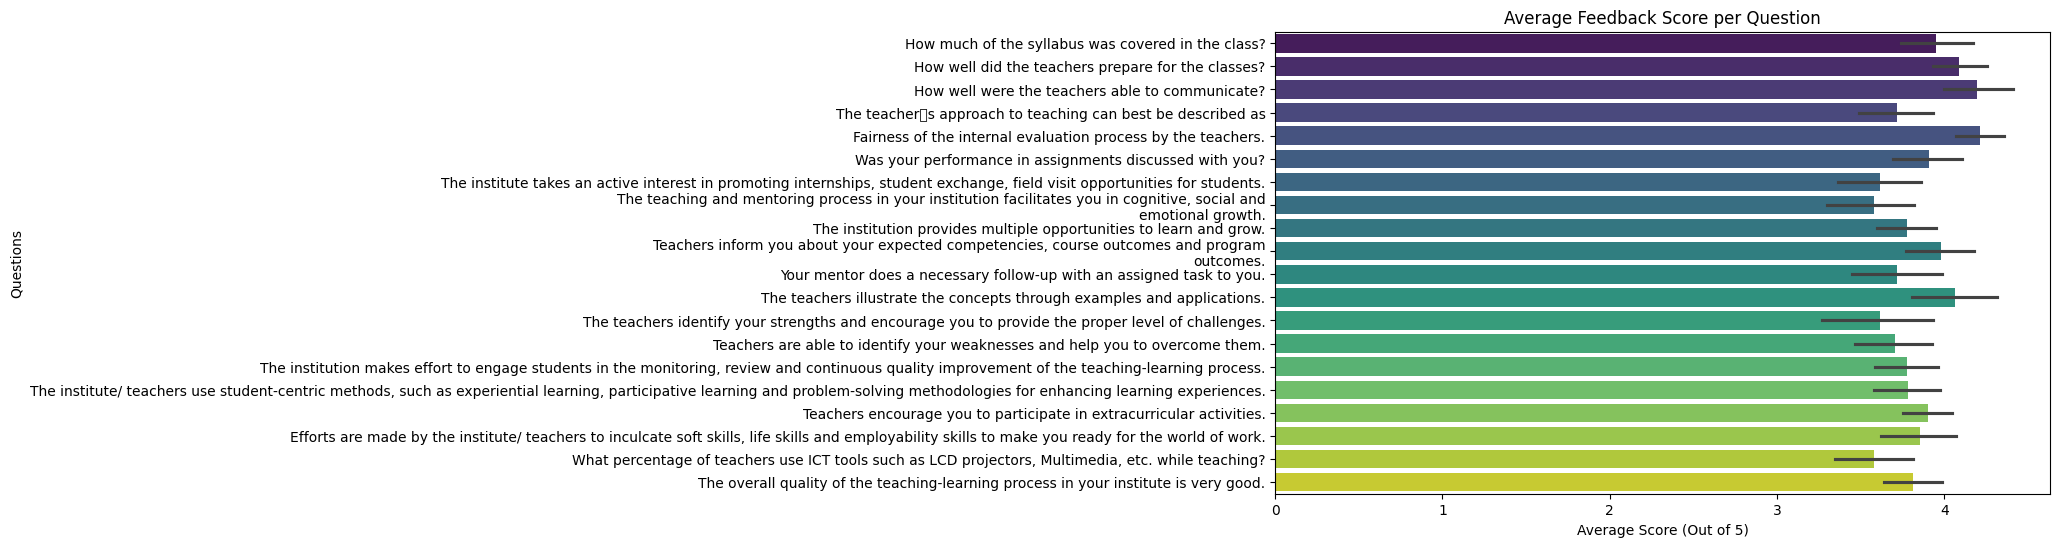

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(y="questions", x="average_score", data=df, palette="viridis")
plt.title("Average Feedback Score per Question")
plt.xlabel("Average Score (Out of 5)")
plt.ylabel("Questions")
plt.tight_layout()
plt.show()


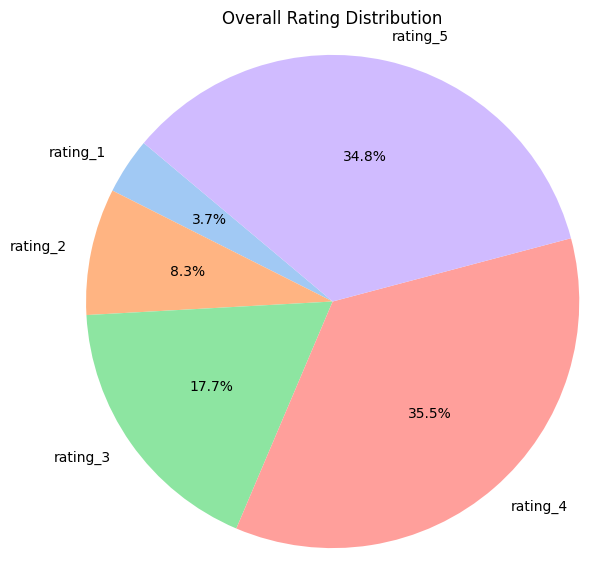

In [16]:
weights = df[['weightage_1', 'weightage_2', 'weightage_3', 'weightage_4', 'weightage_5']].sum()
weights.index = ['rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5']

plt.figure(figsize=(7, 7))
plt.pie(weights, labels=weights.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Overall Rating Distribution")
plt.axis("equal")
plt.show()


/tmp/ipython-input-18-2249670522.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=course_avg.values, y=course_avg.index, palette="coolwarm")


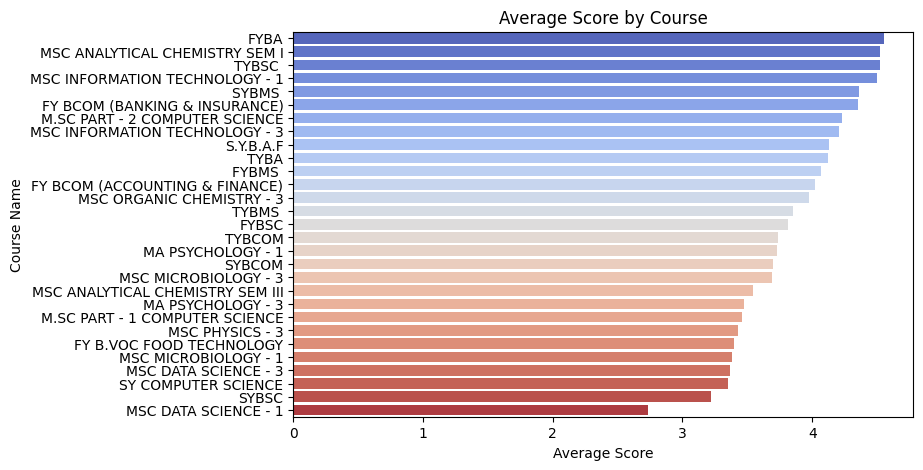

In [18]:
course_avg = df.groupby('course_name_')['average_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=course_avg.values, y=course_avg.index, palette="coolwarm")
plt.title("Average Score by Course")
plt.xlabel("Average Score")
plt.ylabel("Course Name")
plt.show()


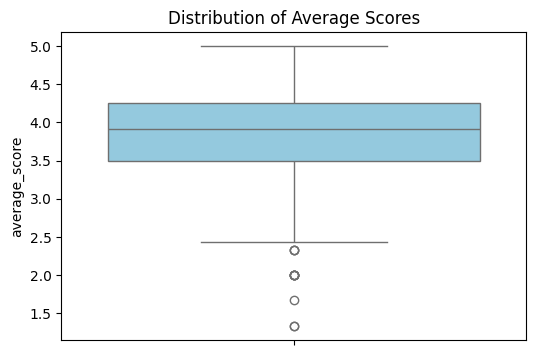

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["average_score"], color="skyblue")
plt.title("Distribution of Average Scores")
plt.show()


In [20]:
print("✅ Recommendations:")
print("- Encourage consistent teaching quality across all departments.")
print("- Improve assignment discussions where scores were low.")
print("- Promote more field/internship activities.")
print("- Focus on areas with average scores < 3.5 for improvement.")

✅ Recommendations:
- Encourage consistent teaching quality across all departments.
- Improve assignment discussions where scores were low.
- Promote more field/internship activities.
- Focus on areas with average scores < 3.5 for improvement.


## 🧾 Final Summary & Recommendations

✅ **Overall Satisfaction** is above average in most courses and questions.

✅ **Top-rated aspects** include:
- Teacher preparation
- Communication effectiveness
- Internal evaluation fairness

❗ **Areas to Improve**:
- Field visits and internships promotion
- Mentoring for emotional/social growth

🎯 **Suggestions**:
- Conduct more skill-based practical sessions.
- Improve institutional support for non-academic development.
- Address feedback questions scoring below 3.5 proactively.

📈 This feedback analysis enables the administration to improve future events and teaching quality based on real student voices.
